<a href="https://colab.research.google.com/github/CristianViSa/TFM/blob/main/tfm_estudio_serie_temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
full_data_path = "/content/drive/MyDrive/datos_web/otros/test3.csv"
ordered_data_path = "/content/drive/MyDrive/datos_web/otros/cleaned_ordered.csv"
# ordered_data_path = "/content/drive/MyDrive/datos_web/otros/cleaned_ordered_2.csv"
final_data_path = "/content/drive/MyDrive/datos_web/otros/final_data.csv"
ordered_data_path_2 = "/content/drive/MyDrive/datos_web/otros/cleaned_ordered_2.csv"
# test_cleaned_full_path = "/content/drive/MyDrive/datos_web/otros/full_cleaned.csv"
to_show_path  = "/content/drive/MyDrive/datos_web/otros/to_show.csv"

In [8]:
final_data = pd.read_csv(final_data_path, index_col="Unnamed: 0")
full_data = pd.read_csv(ordered_data_path_2, index_col="Unnamed: 0")

to_show = pd.read_csv(to_show_path, index_col="Unnamed: 0")
to_show.dropna(inplace=True)

In [9]:
datos = full_data
# datos = to_show
datos.keys()

Index(['ATA', 'barrio', 'carriles', 'comentario', 'cp', 'desc', 'festivo',
       'sentido', 'tipo', 'velocidad', 'fechas', 'dia', 'coches'],
      dtype='object')

In [10]:
datos = datos.set_index(pd.DatetimeIndex(pd.to_datetime(datos['fechas'].values)))
datos.sort_values(['ATA', 'fechas'], ascending=[True, True], inplace=True)

In [11]:
# datos = datos[datos.ATA=="A71"]
datos = datos.loc["2021-04-01 00:00:00":"2021-06-30 23:00:00"]

In [12]:
df_all = datos[['fechas','coches']].groupby(by=datos.index).sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


     mes  vehiculos/hora
0  Abril      617.761752
1   Mayo      708.707369
2  Junio      651.541494


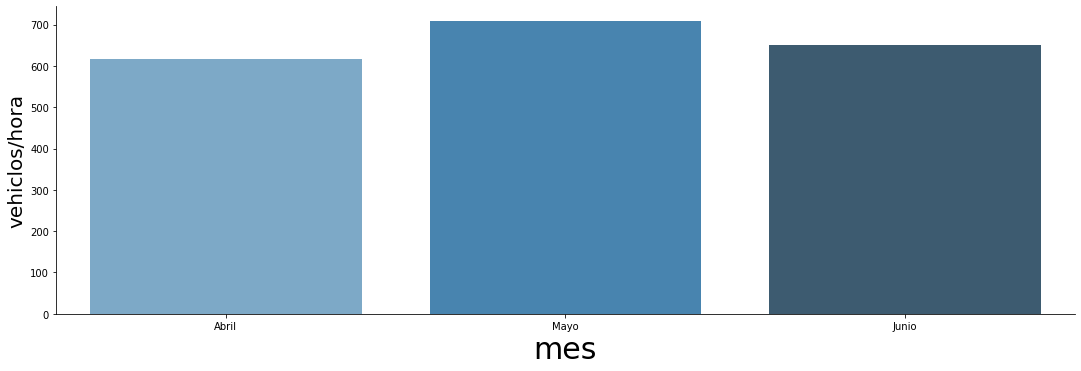

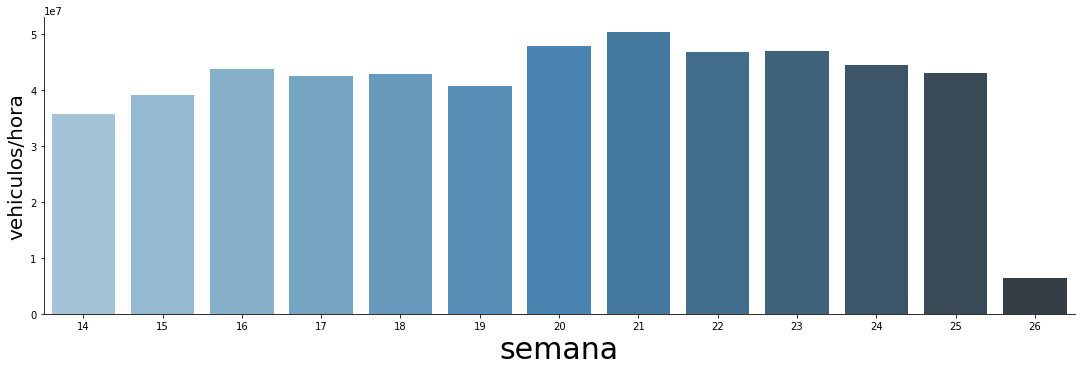

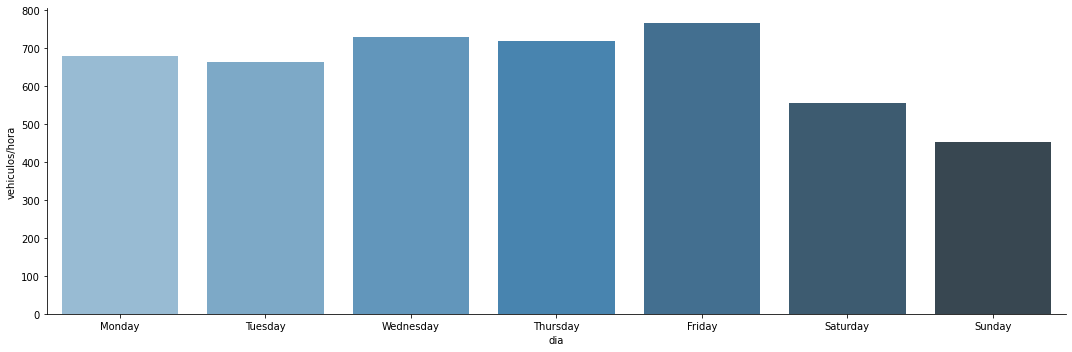

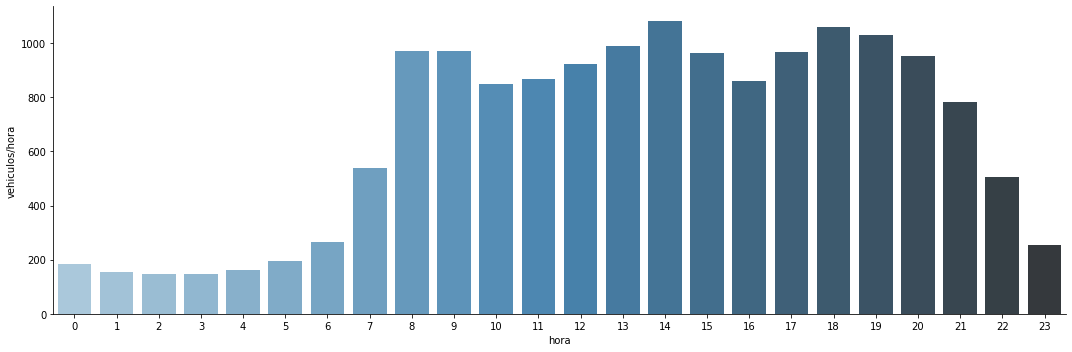

In [14]:
df_months = datos[['fechas','coches']].groupby(by=datos.index.month).sum().reset_index()
df_weeks = datos[['fechas','coches']].groupby(by=datos.index.week).sum().reset_index()
df_days = datos[['fechas','coches']].groupby(by=datos.index.weekday).sum().reset_index()
df_hours = datos[['fechas','coches']].groupby(by=datos.index.hour).sum().reset_index()

df_months.rename(columns={'coches': 'vehiculos/hora'}, inplace=True)
df_weeks.rename(columns={'coches': 'vehiculos/hora'}, inplace=True)
df_days.rename(columns={'coches': 'vehiculos/hora'}, inplace=True)
df_hours.rename(columns={'coches': 'vehiculos/hora'}, inplace=True)

df_months.rename(columns={'index': 'mes'}, inplace=True)
df_weeks.rename(columns={'index': 'semana'}, inplace=True)
df_days.rename(columns={'index': 'dia'}, inplace=True)
df_hours.rename(columns={'index': 'hora'}, inplace=True)
df_weeks.drop(0, axis = 0, inplace=True)

df_months["vehiculos/hora"] = np.divide(df_months["vehiculos/hora"], (30*24*386))
df_days["vehiculos/hora"] = np.divide(df_days["vehiculos/hora"], (13*24*386))
df_hours["vehiculos/hora"] = np.divide(df_hours["vehiculos/hora"], (30*3*386))

# dayOfWeek={0:'Lunes', 1:'Martes', 2:'Miercoles', 3:'Jueves', 4:'Viernes', 5:'Sabado', 6:'Domingo'}
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
monthOfYear={1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 6:'Junio', 7:'Julio'}
df_days['dia'] = df_days['dia'].map(dayOfWeek)
df_months['mes'] = df_months['mes'].map(monthOfYear)
print(df_months)
# sns.set(font_scale=1.2)
b = sns.catplot(x='mes',y='vehiculos/hora',data=df_months,kind='bar',aspect=3, palette="Blues_d")
b.set_xlabels("mes",fontsize=30)
b.set_ylabels("vehiclos/hora",fontsize=20)

# print(df_months)
b = sns.catplot(x='semana',y='vehiculos/hora',data=df_weeks,kind='bar',aspect=3, palette="Blues_d")
b.set_xlabels("semana",fontsize=30)
b.set_ylabels("vehiculos/hora",fontsize=20)
# print(df_months)
b = sns.catplot(x='dia',y='vehiculos/hora',data=df_days,kind='bar',aspect=3, palette="Blues_d")
b.set_xlabels("dia")
b.set_ylabels("vehiculos/hora")
# print(df_months)
b = sns.catplot(x='hora',y='vehiculos/hora',data=df_hours,kind='bar',aspect=3, palette="Blues_d")
b.set_xlabels("hora")
b.set_ylabels("vehiculos/hora")

In [15]:
# df_all.set_index("index", inplace=True)
df_all.index.name = ""
df_all.set_index(pd.to_datetime(df_all['index']), inplace=True)
# df_all.sort_values(['index'], ascending=[True], inplace=True)
df_all.index.name = ""

Seasonal decompose y ADF Test

ADF Statistic: -15.063135
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.568


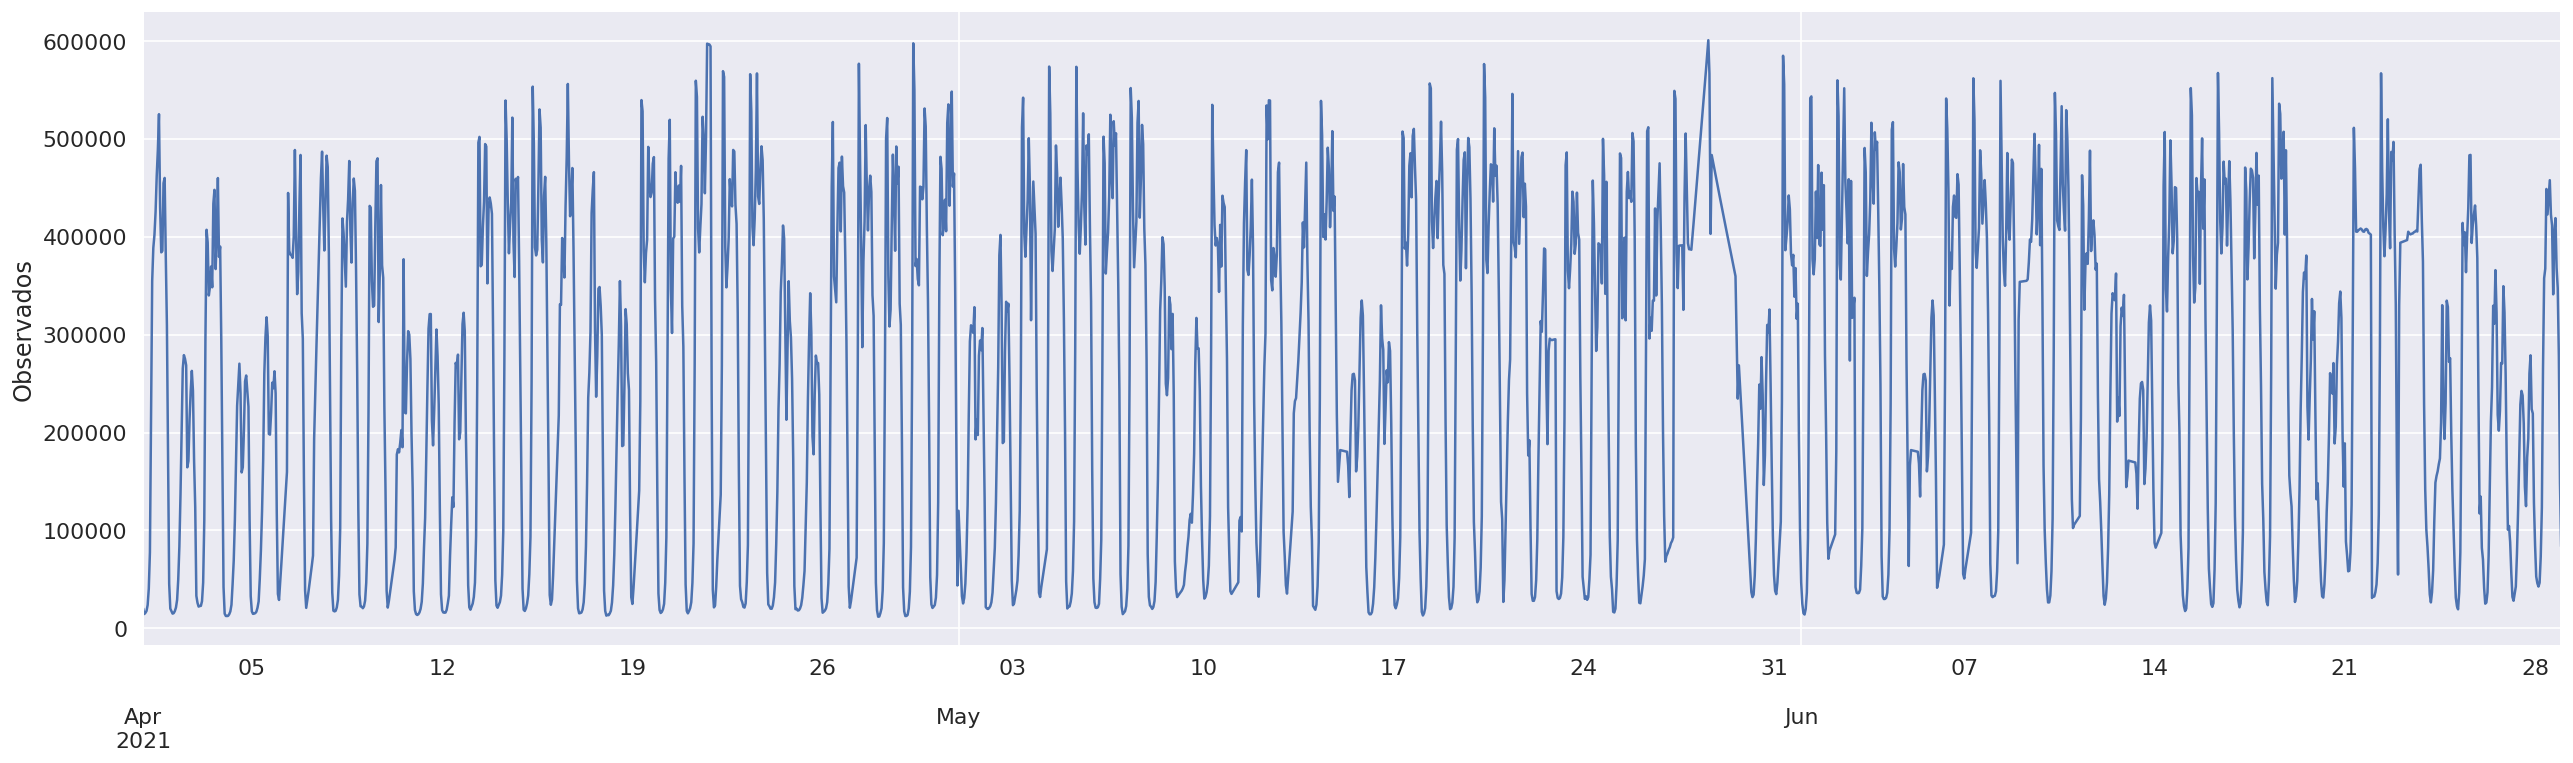

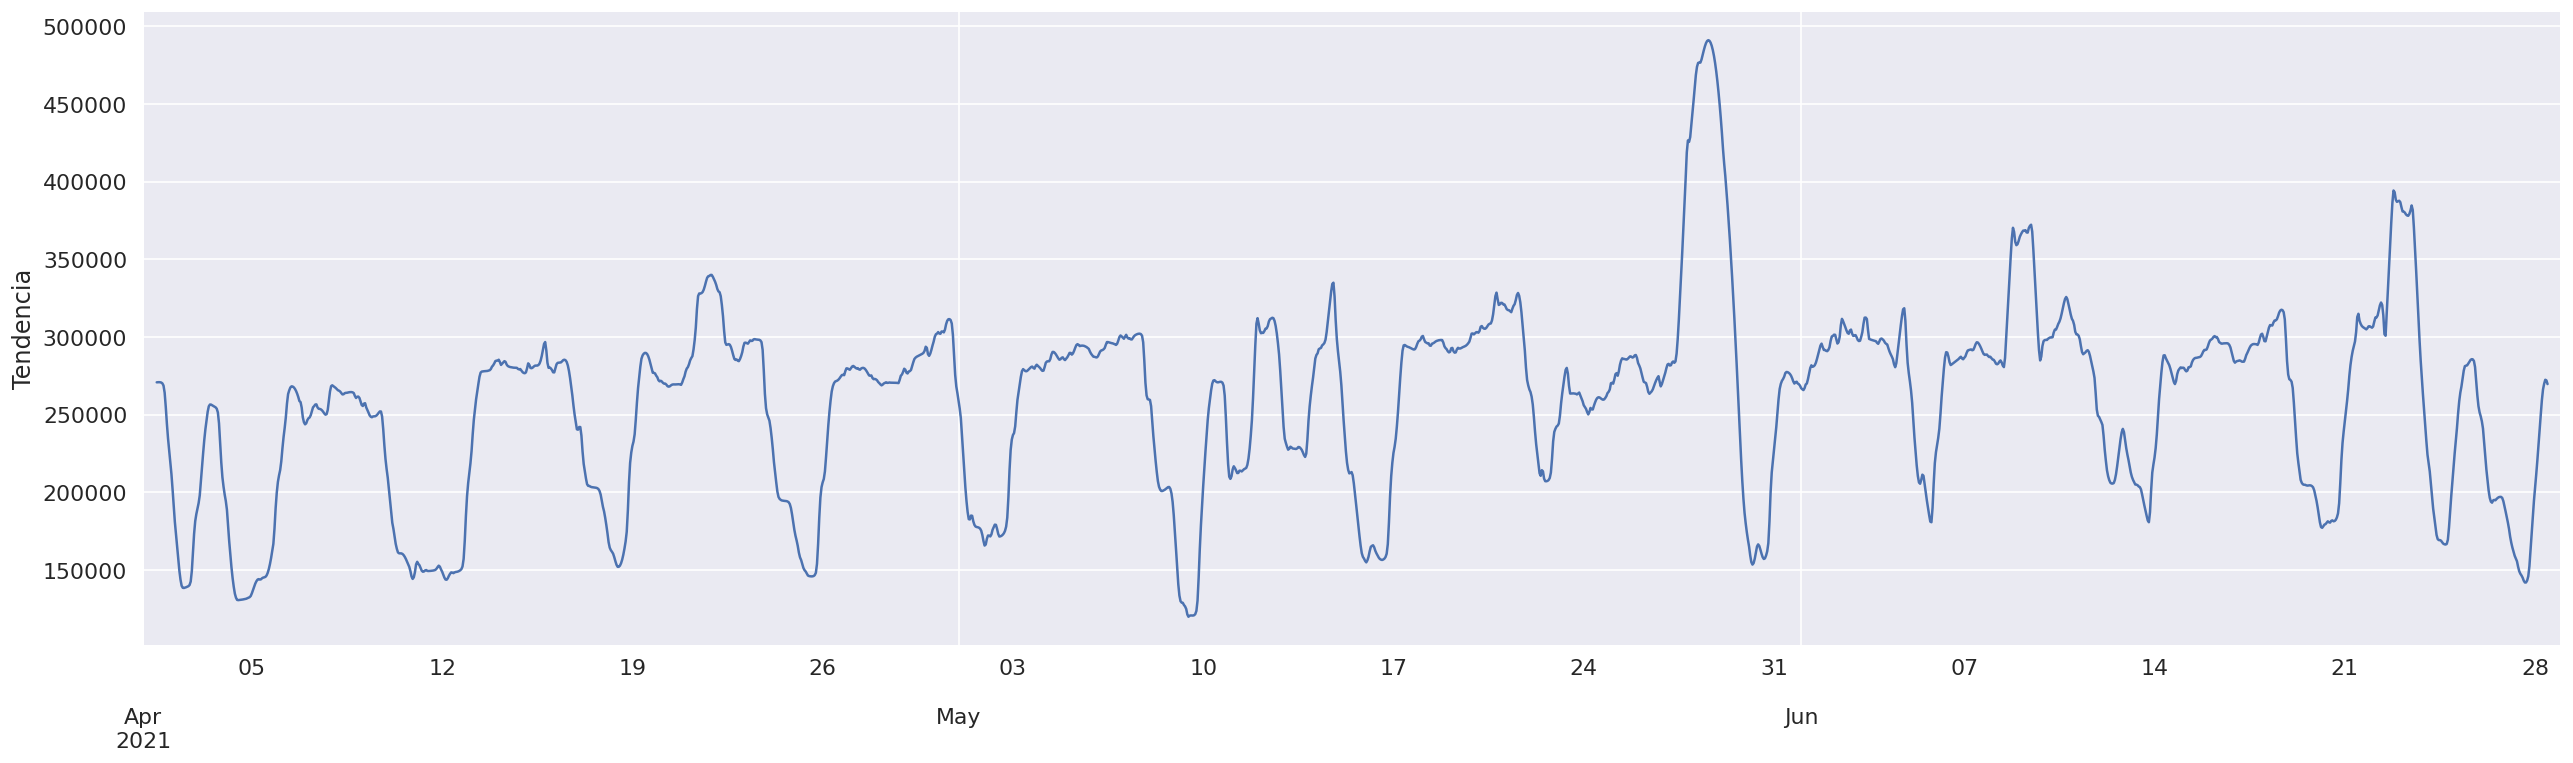

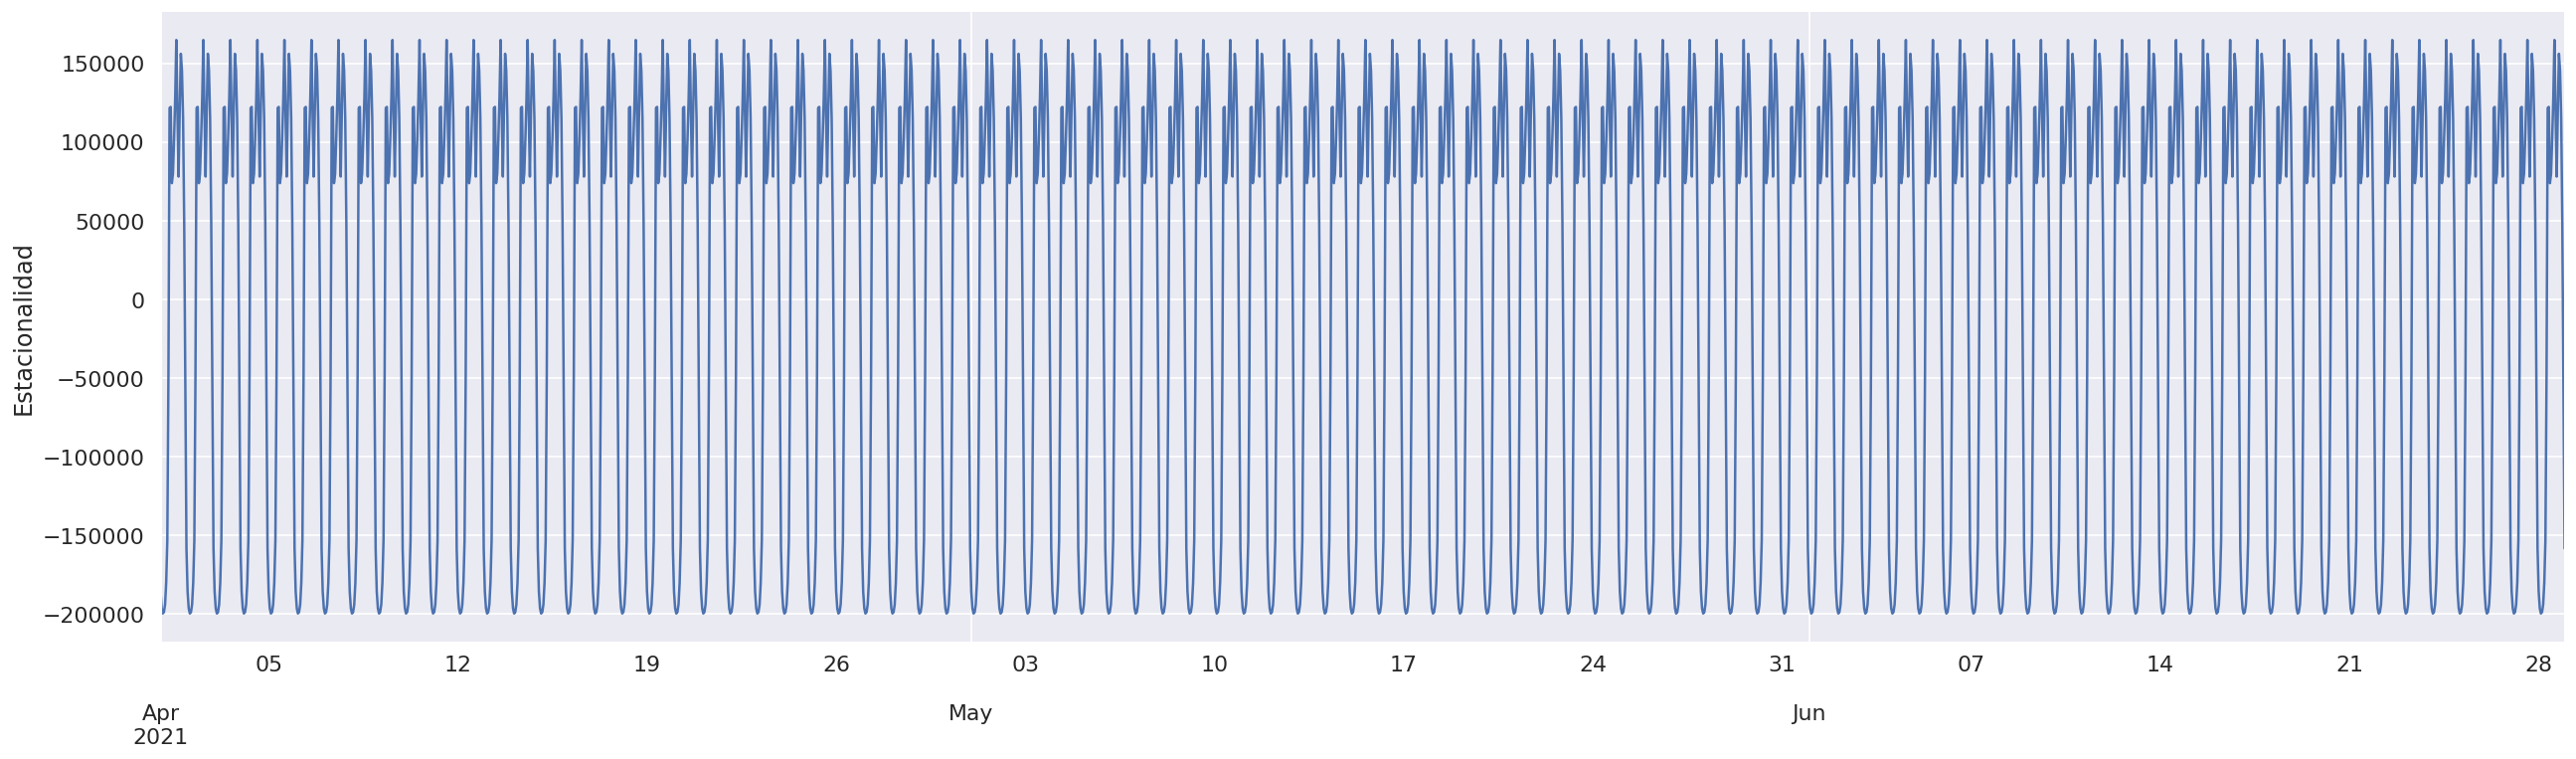

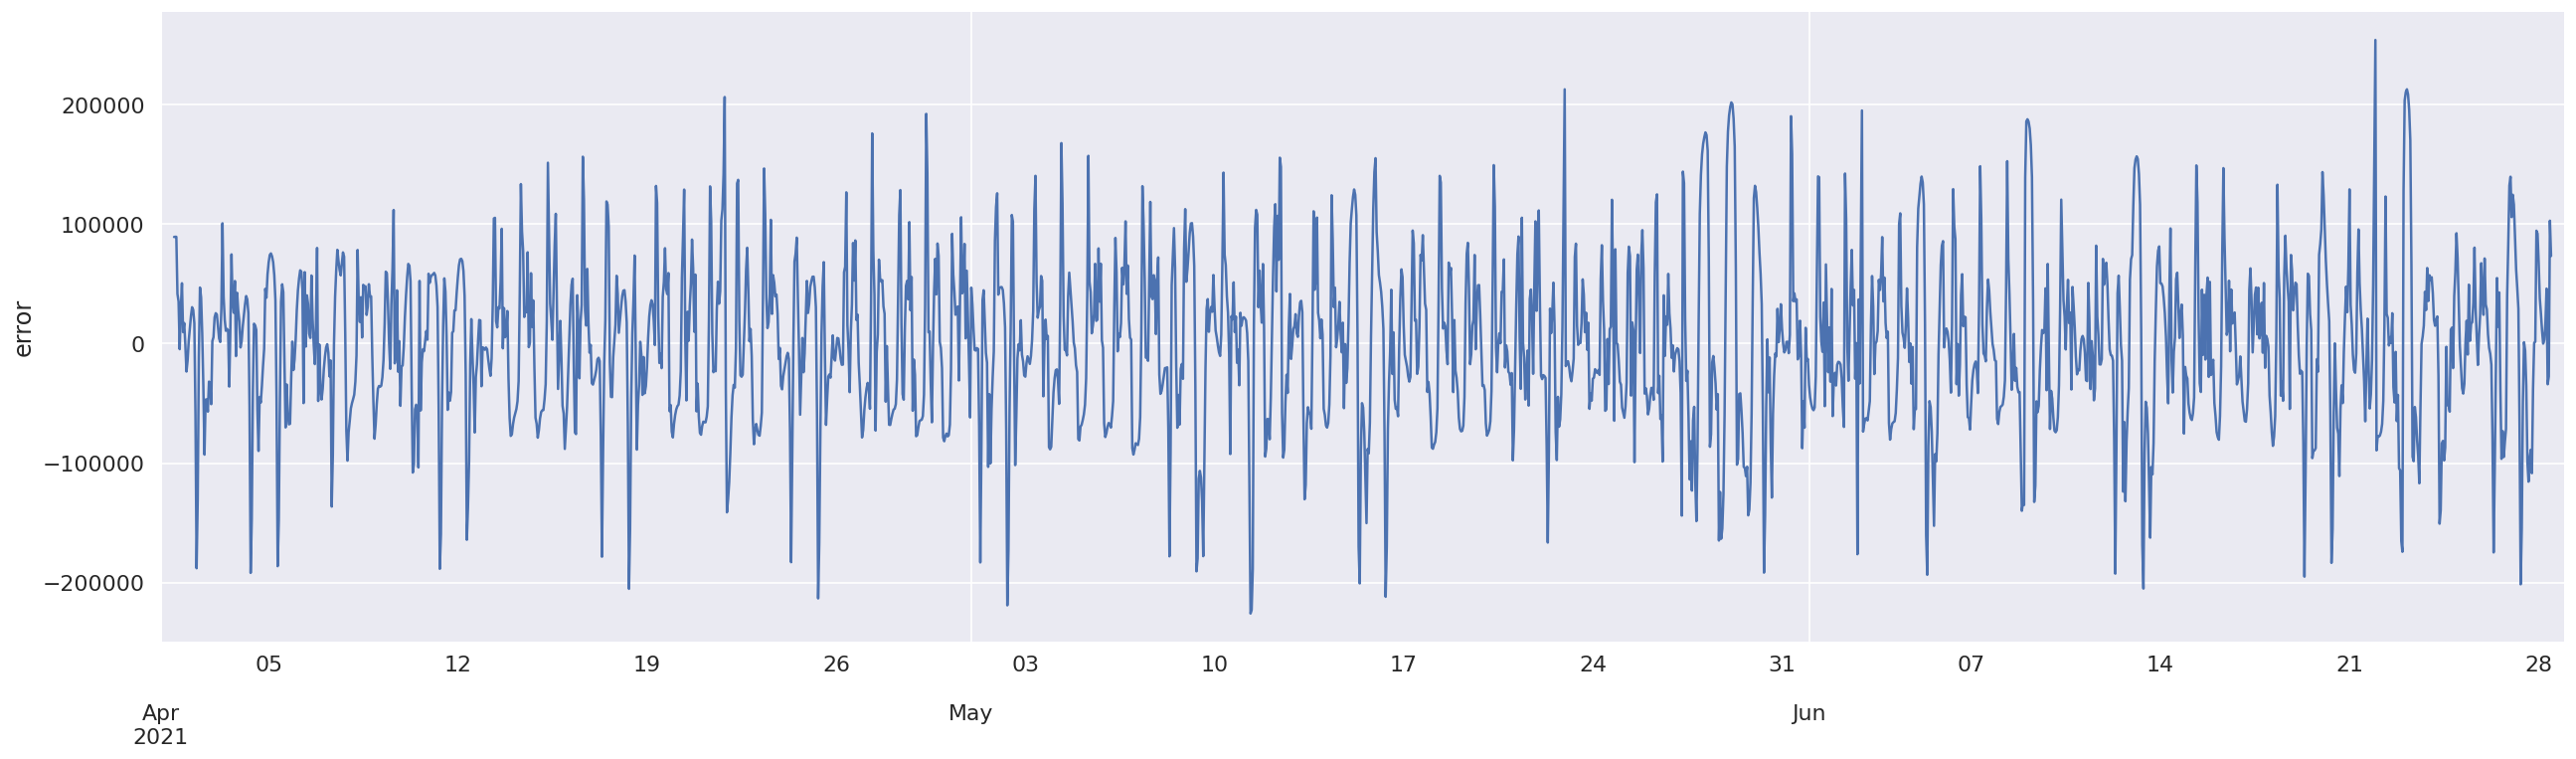

In [18]:
# Cambiar la frecuencia temporal
result = seasonal_decompose(df_all.coches, model='additive', freq=24)

sns.set(font_scale=1.2)
plt.rcParams.update({'font.size': 17}) # m7ust set in top
fig, ax = plt.subplots(1, 1, figsize=(16,10), dpi= 120)
ax.set_ylabel("Observados")
ax = result.observed.plot(figsize=(26,7))

fig, ax = plt.subplots(1, 1, figsize=(16,7), dpi= 120)
ax.set_ylabel("Tendencia")
ax = result.trend.plot(figsize=(26,7))
# x = df.index.values
# y = df['coches'].values

fig, ax = plt.subplots(1, 1, figsize=(16,7), dpi= 120)
ax.set_ylabel("Estacionalidad")
ax = result.seasonal.plot(figsize=(26,7))
# x = df.index.values
# y = df['coches'].values


fig, ax = plt.subplots(1, 1, figsize=(16,7), dpi= 120)
ax.set_ylabel("error")
ax = result.resid.plot(figsize=(26,7))


from statsmodels.tsa.stattools import adfuller
X = result.resid.dropna()
# X = df_all['coches']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Autocorrelacion

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


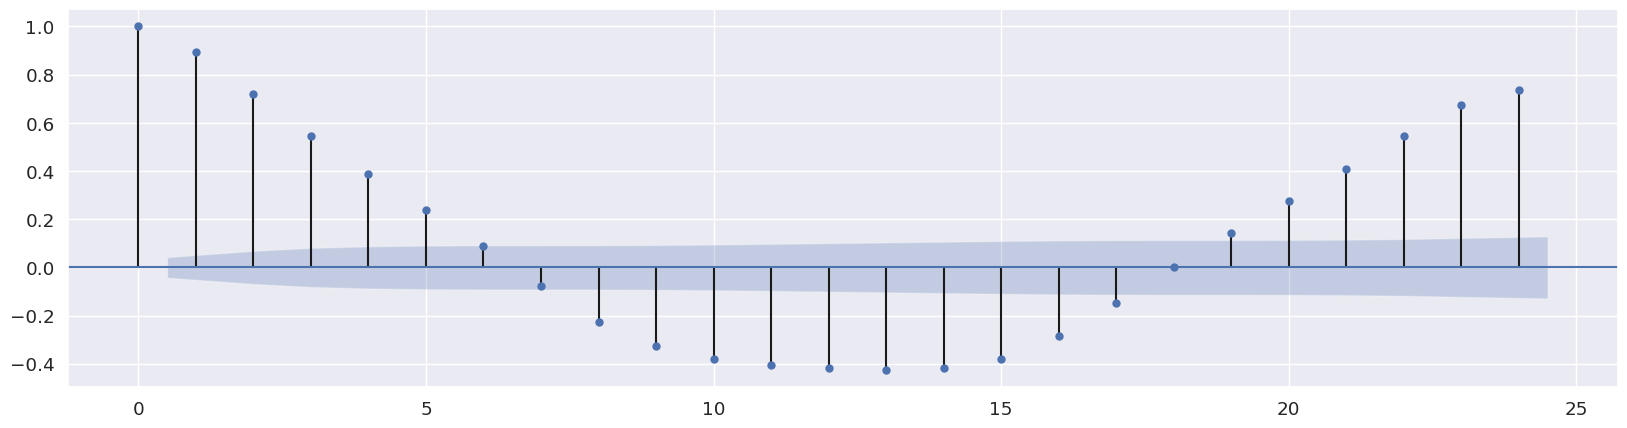

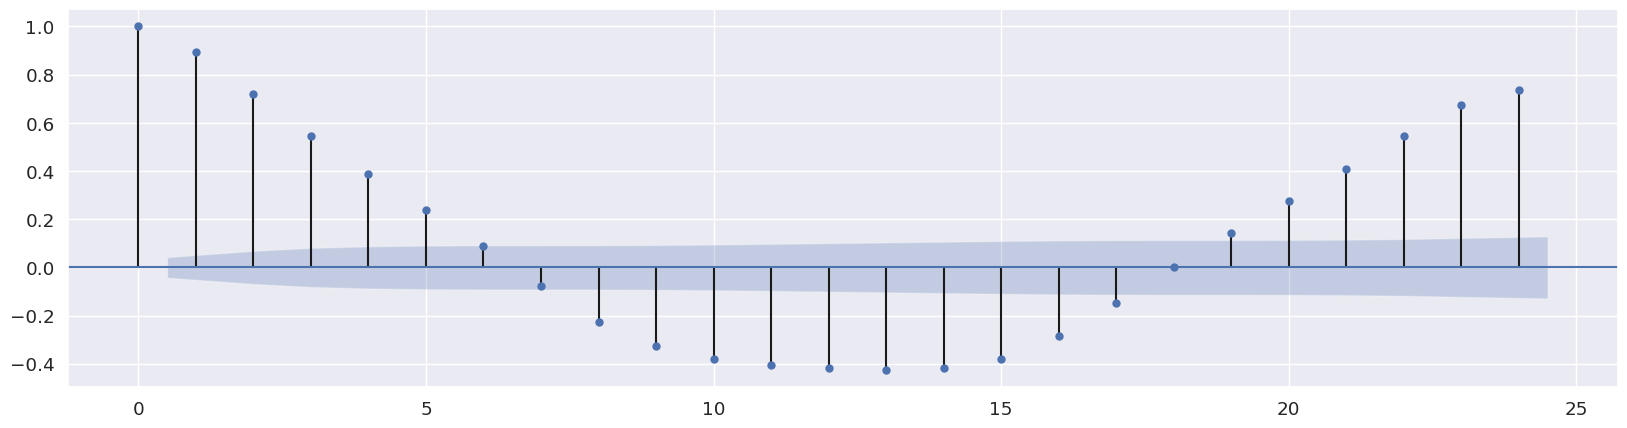

In [19]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = df_all.coches

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)
acf(df.values.tolist())
# Draw Plot
fig, axes = plt.subplots(1,1,figsize=(20,5), dpi= 100)
plot_acf(df.values.tolist(), lags=24,ax = axes, title="")
# plot_pacf(df.values.tolist(), lags=24*7, ax = axes)